<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2022/blob/main/Tutorial_7_Data_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import model_selection

# Scaler Transform
For classifiers like kNN it is vital that you scale the data so each feature is treated equally.  Otherwise, features which happen to have bigger numbers will be treated as being farther apart, so they will become more important in minimizing distance.

The good news is that scaling the data is simple using the built-in tools.

**References:**
* https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler


**Examples**
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


# Simple Demo

In [34]:
# Example: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

print(scaler.mean_)

print(scaler.transform(data))

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [35]:
# Can also do a single step:
print(scaler.fit_transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


# Iris Data

Features:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:	 ['setosa' 'versicolor' 'virginica']


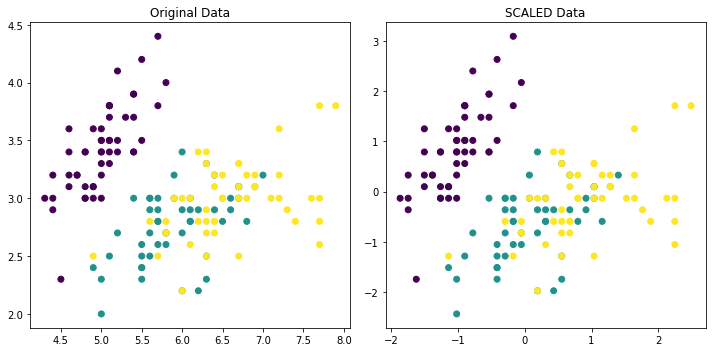

In [38]:
data = datasets.load_iris()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1],c=y)
plt.title('SCALED Data')
plt.tight_layout()
plt.show()

# Wine Data
The scaling doesn't make much of a numerical difference on iris because all features are measured in centimeters.  Lets try something more extreme. See more great examples here: 
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Load up the wine data and look at some stats:

In [39]:
data = datasets.load_wine(as_frame=True)
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

Features:	 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets:	 ['class_0' 'class_1' 'class_2']


In [9]:
import pandas as pd

In [12]:
df = data.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Features:	 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets:	 ['class_0' 'class_1' 'class_2']


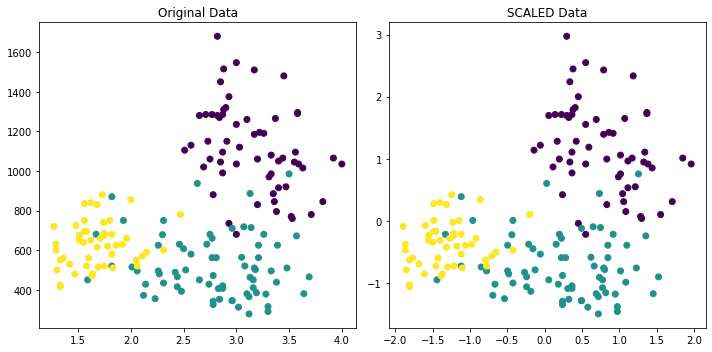

In [36]:
data = datasets.load_wine()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:,11], X[:,12],c=y)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,11], X_scaled[:,12],c=y)
plt.title('SCALED Data')

plt.tight_layout()
plt.show()

In [40]:
# Does it make a difference?
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
data = datasets.load_wine()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)
X = data.data
y = data.target

# UN-scaled
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf.fit(X_train,y_train)
print('UNSCALED score:\t',clf.score(X_test,y_test))

# UN-scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, random_state=0)
clf.fit(X_train,y_train)
print('SCALED score:\t',clf.score(X_test,y_test))


Features:	 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets:	 ['class_0' 'class_1' 'class_2']
UNSCALED score:	 0.7333333333333333
SCALED score:	 0.9777777777777777
